# Clustering con Python

### Importar el dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

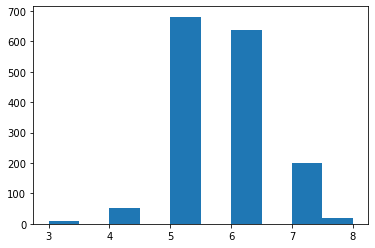

In [5]:
plt.hist(df["quality"])

In [6]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [7]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [10]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

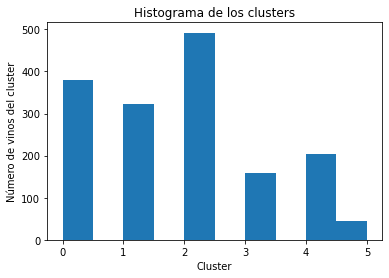

In [11]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [12]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
Z = linkage(df_norm, "ward")

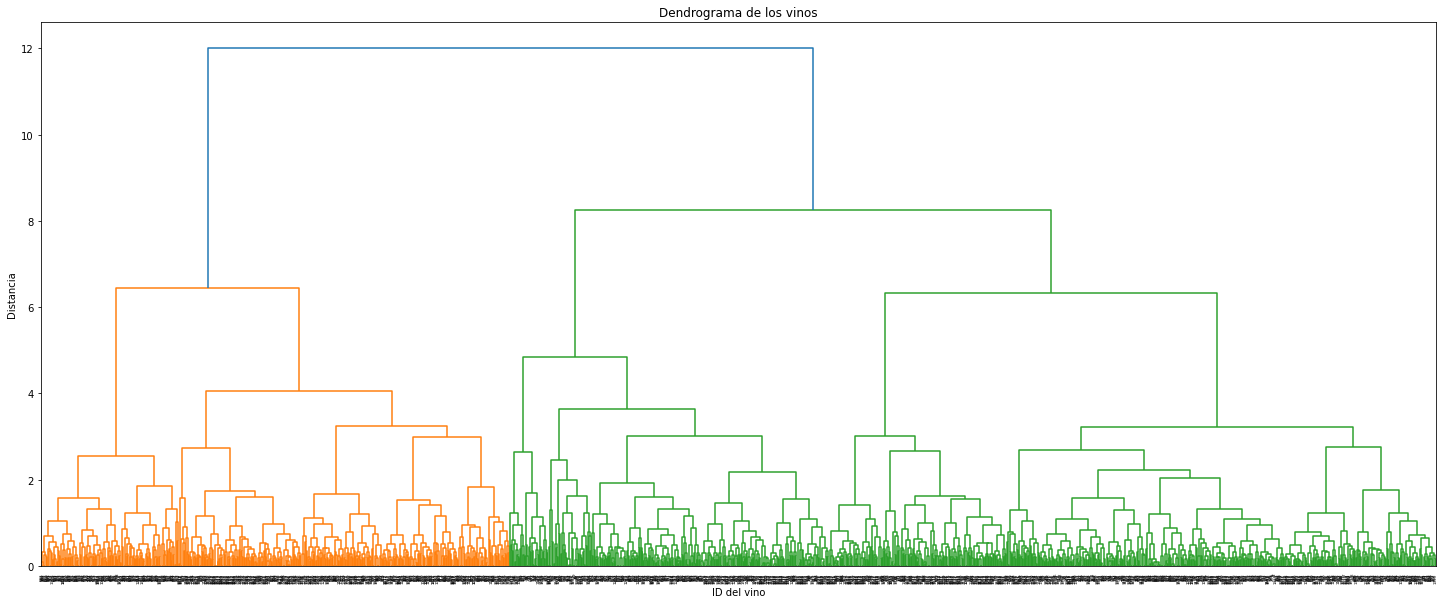

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

## K-means

In [16]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [17]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [18]:
model.labels_

array([3, 3, 3, ..., 0, 0, 2])

In [19]:
md_k = pd.Series(model.labels_)

In [20]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [21]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


(array([229.,   0.,  28.,   0., 276.,   0., 512.,   0., 246., 308.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

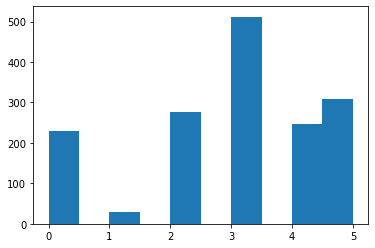

In [22]:
plt.hist(md_k)

In [23]:
model.cluster_centers_

array([[0.17556131, 0.32434049, 0.08882096, 0.0943052 , 0.09611361,
        0.24952334, 0.12330458, 0.32533392, 0.57751951, 0.18442591,
        0.48708991, 0.60960699],
       [0.33375474, 0.28962818, 0.49428571, 0.07363014, 0.56671834,
        0.20372233, 0.20368501, 0.51384519, 0.23762655, 0.58639863,
        0.16098901, 0.47142857],
       [0.36344107, 0.16000347, 0.41978261, 0.10348422, 0.10664513,
        0.16033884, 0.08339735, 0.41617719, 0.4206322 , 0.23585438,
        0.47892977, 0.69057971],
       [0.26334347, 0.35948202, 0.12203125, 0.09109455, 0.12267516,
        0.14787357, 0.11134883, 0.49132279, 0.48637426, 0.15520911,
        0.21853466, 0.43828125],
       [0.58273977, 0.20763726, 0.51170732, 0.13439693, 0.13088888,
        0.13740982, 0.09134132, 0.65692191, 0.3304846 , 0.22335816,
        0.29016052, 0.54634146],
       [0.31915872, 0.27587395, 0.30808442, 0.15442092, 0.127057  ,
        0.38437443, 0.29938966, 0.54199325, 0.43422129, 0.18193483,
        0.21476856,

In [24]:
model.inertia_

186.5691646021945

## Interpretación final

In [25]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.175561,0.324340,0.088821,0.094305,0.096114,0.249523,0.123305,0.325334,0.577520,0.184426,0.487090,0.609607,3.423581
1,0.333755,0.289628,0.494286,0.073630,0.566718,0.203722,0.203685,0.513845,0.237627,0.586399,0.160989,0.471429,4.892857
2,0.363441,0.160003,0.419783,0.103484,0.106645,0.160339,0.083397,0.416177,0.420632,0.235854,0.478930,0.690580,0.134058
3,0.263343,0.359482,0.122031,0.091095,0.122675,0.147874,0.111349,0.491323,0.486374,0.155209,0.218535,0.438281,2.015625
4,0.582740,0.207637,0.511707,0.134397,0.130889,0.137410,0.091341,0.656922,0.330485,0.223358,0.290161,0.546341,2.073171
5,0.319159,0.275874,0.308084,0.154421,0.127057,0.384374,0.299390,0.541993,0.434221,0.181935,0.214769,0.457143,1.025974
